# Global Cybersecurity Threats

This notebook visualize this [dataset](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data).

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import shutil
import os

/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = "./datasets/global-cybersecurity-threats-2015-2024"

In [ ]:
# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")
os.makedirs(folder_path, exist_ok=True)
shutil.move(path, folder_path)

print("Path to dataset files:", folder_path)

Path to dataset files: ./datasets/global-cybersecurity-threats-2015-2024


In [ ]:
df = pd.read_csv(f"{ folder_path }/1/Global_Cybersecurity_Threats_2015-2024.csv")
df.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 68


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [4]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


In [35]:
print(df.shape)
print('---'*30)
print(df.info())
print('---'*30)
print(df.describe())
print('---'*30)

(3000, 10)
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  

In [6]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [7]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [40]:
print(f'Countries: \n{ df["Country"].unique() }')
print('---'*30)
print(f'Attack Types: \n{ df["Attack Type"].unique() }')
print('---'*30)
print(f'Target Industries: \n{ df["Target Industry"].unique() }')
print('---'*30)
print(f'Attack Sources: \n{ df["Attack Source"].unique() }')
print('---'*30)
print(f'Security Vulnerability Types: \n{ df["Security Vulnerability Type"].unique() }')
print('---'*30)
print(f'Defense Mechanism Used: \n{ df["Defense Mechanism Used"].unique() }')
print('---'*30)


Countries: 
['China' 'India' 'UK' 'Germany' 'France' 'Australia' 'Russia' 'Brazil'
 'Japan' 'USA']
------------------------------------------------------------------------------------------
Attack Types: 
['Phishing' 'Ransomware' 'Man-in-the-Middle' 'DDoS' 'SQL Injection'
 'Malware']
------------------------------------------------------------------------------------------
Target Industries: 
['Education' 'Retail' 'IT' 'Telecommunications' 'Government' 'Banking'
 'Healthcare']
------------------------------------------------------------------------------------------
Attack Sources: 
['Hacker Group' 'Nation-state' 'Insider' 'Unknown']
------------------------------------------------------------------------------------------
Security Vulnerability Types: 
['Unpatched Software' 'Weak Passwords' 'Social Engineering' 'Zero-day']
------------------------------------------------------------------------------------------
Defense Mechanism Used: 
['VPN' 'Firewall' 'AI-based Detection' 'Antiviru

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64


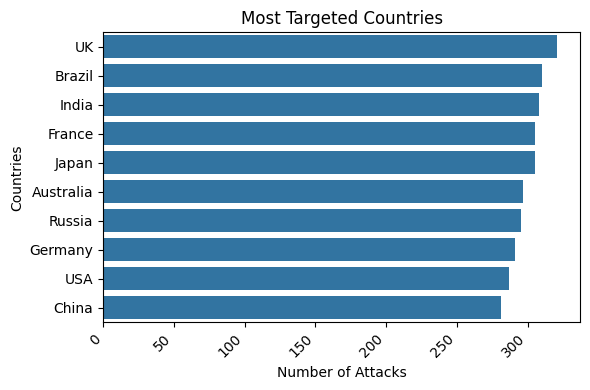

In [67]:
print(df['Country'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index)
plt.title('Most Targeted Countries')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


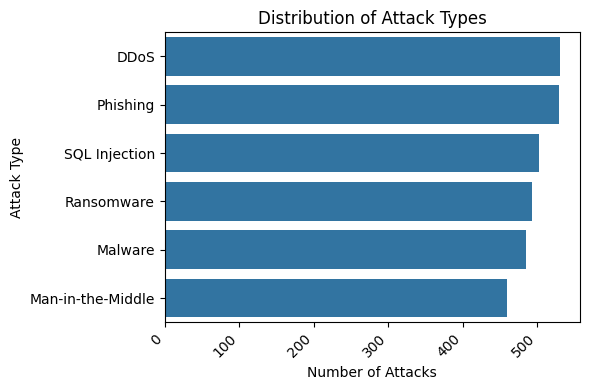

In [66]:
print(df["Attack Type"].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="Attack Type", order=df["Attack Type"].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64


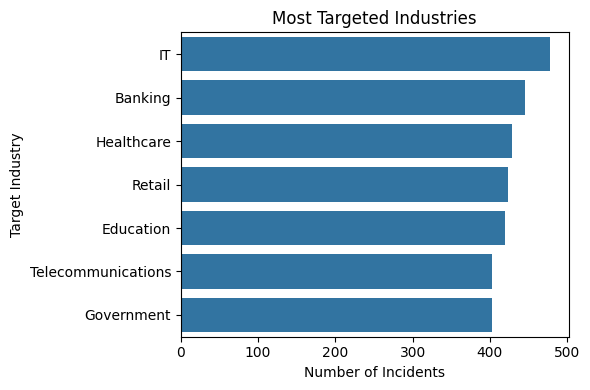

In [55]:
print(df["Target Industry"].value_counts())


plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='Target Industry', order=df['Target Industry'].value_counts().index)
plt.title('Most Targeted Industries')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64


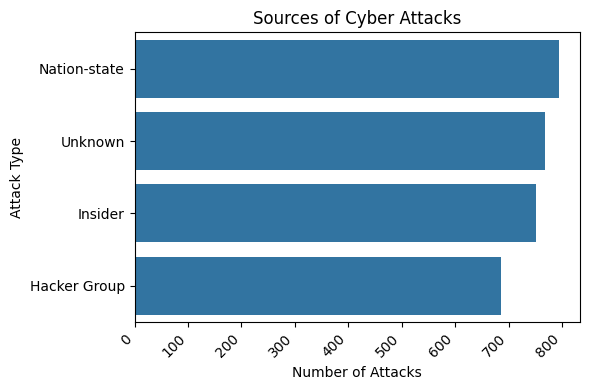

In [58]:
print(df['Attack Source'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="Attack Source", order=df["Attack Source"].value_counts().index)
plt.title('Sources of Cyber Attacks')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64


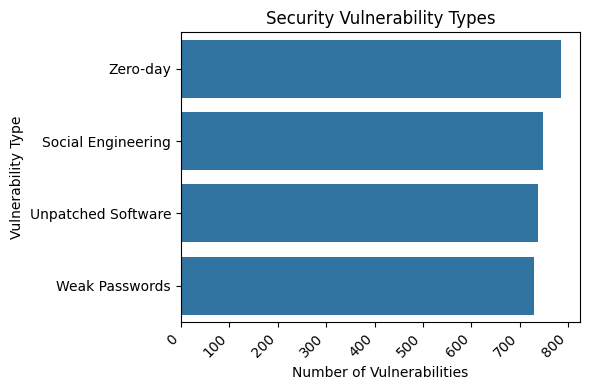

In [68]:
print(df['Security Vulnerability Type'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="Security Vulnerability Type", order=df["Security Vulnerability Type"].value_counts().index)
plt.title('Security Vulnerability Types')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Vulnerabilities')
plt.ylabel('Vulnerability Type')
plt.tight_layout()
plt.show()

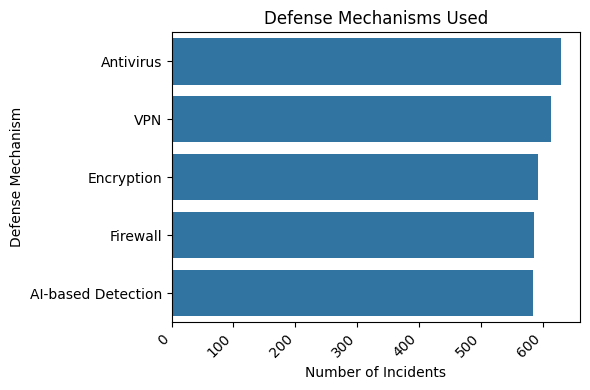

In [70]:
df['Defense Mechanism Used'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="Defense Mechanism Used", order=df["Defense Mechanism Used"].value_counts().index)
plt.title('Defense Mechanisms Used')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Incidents')
plt.ylabel('Defense Mechanism')
plt.tight_layout()
plt.show()

Year
2017    319
2022    318
2023    315
2020    315
2018    310
2024    299
2021    299
2016    285
2015    277
2019    263
Name: count, dtype: int64


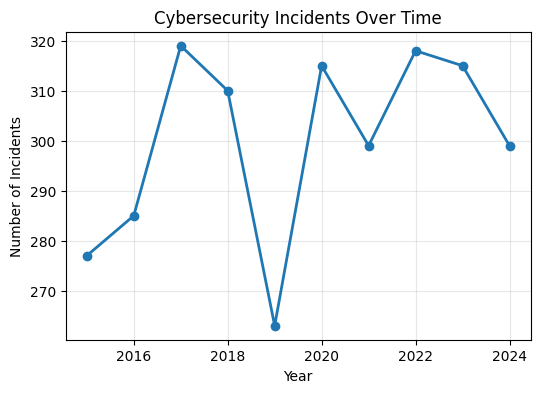

In [69]:
print(df['Year'].value_counts())

plt.figure(figsize=(6, 4))
yearly_incidents = df['Year'].value_counts().sort_index()
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o', linewidth=2)
plt.title('Cybersecurity Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, alpha=0.3)
plt.show()

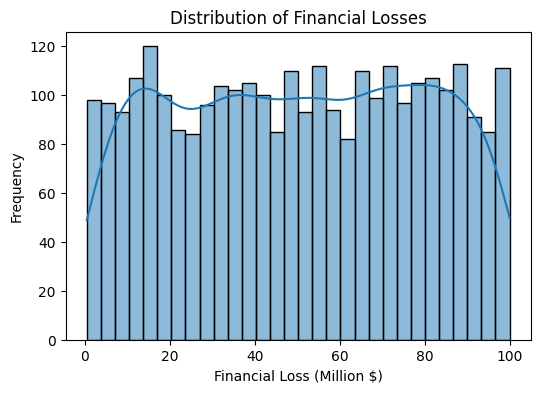

In [49]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Financial Loss (in Million $)', bins=30, kde=True)
plt.title('Distribution of Financial Losses')
plt.xlabel('Financial Loss (Million $)')
plt.ylabel('Frequency')
plt.show()


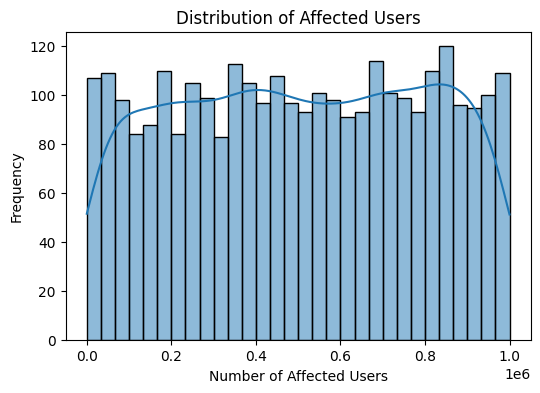

In [60]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Number of Affected Users', bins=30, kde=True)
plt.title('Distribution of Affected Users')
plt.xlabel('Number of Affected Users')
plt.ylabel('Frequency')
plt.show()

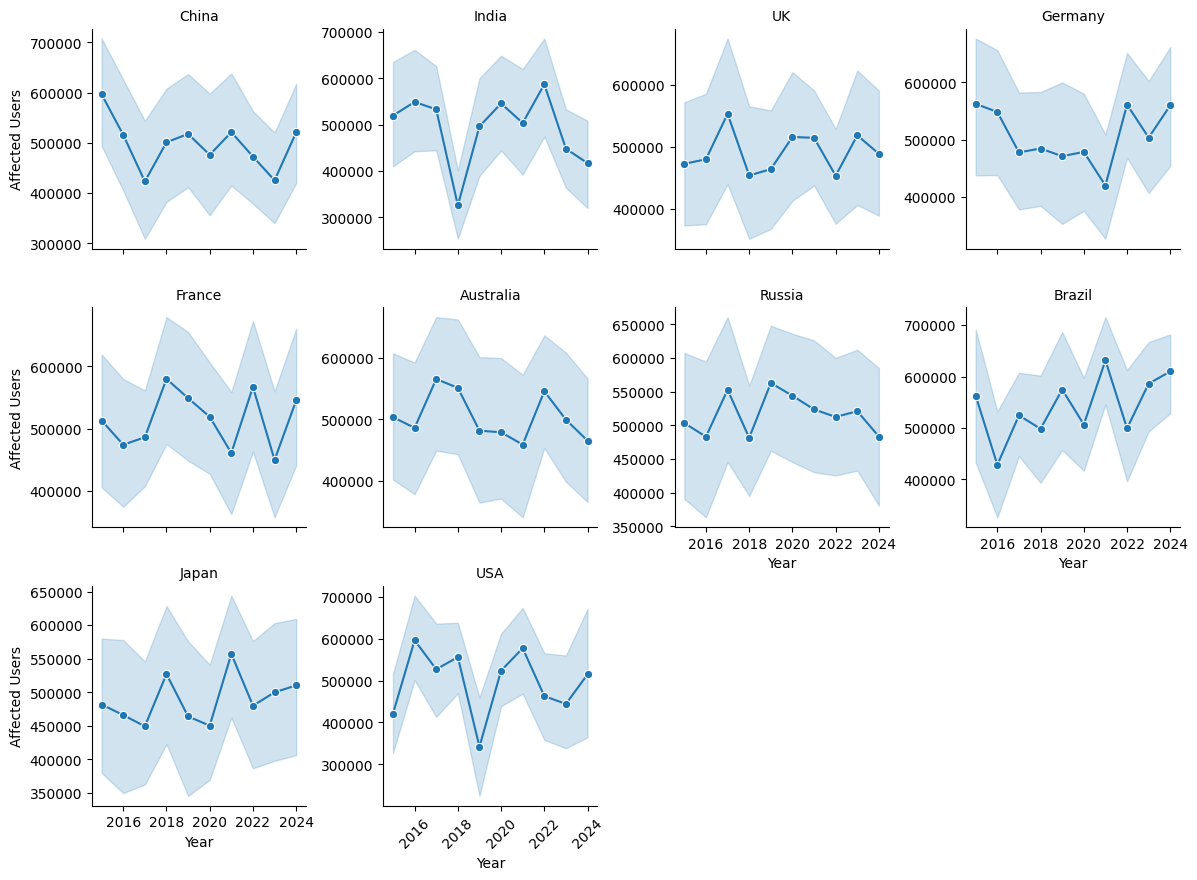

In [ ]:
g = sns.FacetGrid(df, col='Country', col_wrap=4, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='Number of Affected Users', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Affected Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
